### TEMEL BİLEŞEN ANALİZİ
#### Temel Bileşene Analizi Nedir?

--TBA, çok boyutlu uzaydaki bir verinin daha düşük boyutlu bir uzaya izdüşümü, varyansı maksimize edecek şekilde bulma yöntemidir. <br>
--Uzayda bir noktalar kümesi için, tüm noktalara ortalama uzaklığı en az olan "en uygun doğru" seçilir. <br>
--Daha sonra bu doğruya dik olanlar arasından yine en uygun doğru seçilerek, bu adımlar, yeni bir boyutun varyansı belirli bir eşiğin altına inene kadar tekrarlanır. <br>
--Bu sürecin sonunda elde edilen doğrular, bir doğrusal uzayın tabanlarının oluşturur. Bu taban vektörleine temel bileşen denir. <br>
--Verinin temel bileşenleri birbirinden bağımsız olur

##### Veri Seti Tanıma
--TBA için iris veri seti kullanıldı
<br>
--3 adet sınıf ve her sınıfa ait 4 özellik vardır
<br>
--Kendime not: Bunun amacı veri setindeki gereksiz duran özellikleri atabilmek ve böylece atıyorum 10 özellik ile işlem yapmak yerine 6 tanesi ile yapabilir hale getirmek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y=iris.target
#target in içinde etiketler var

df = pd.DataFrame(data, columns=feature_names)
df["sinif"] = y
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


##### TBA Uygulaması

In [3]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True) #whiten = normalize et. Böylece önce normalize edecek sonra da veriyi öyle fit edeecek
#Bana bu 4 boyutlu uzayda öyle bir 2 doğrutu bul ki bunlar varyansı en yüksek yonler olsun
pca.fit(data)

x_pca = pca.transform(data)

print("variance raito..:",pca.explained_variance_ratio_)
print("sum..:", sum(pca.explained_variance_ratio_))
print()

variance raito..: [0.92461872 0.05306648]
sum..: 0.977685206318795



In [4]:
#Buradan şu anlaşılır
#2 temel bileşen seçmiştik. Öyle 2 temel bileşen var ki
#hatta 1. si öyle bir bileşen ki %92 oranında o yöne doğru bir değişim var
#2. de %5. böylece neredeyse %97 lik bir etkisi var

In [5]:
#Velhasıl datasetinde ben 2 boyuta indirgeyerek de
#işlemlerimizi yapabiliriz

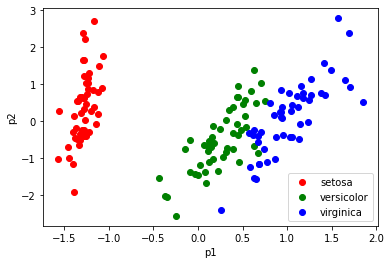

In [6]:
#Temel bileşenleri görselleştirme

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each], df.p2[df.sinif == each], color = color[each], label=iris.target_names[each])

plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [7]:
#TBA sonucunda setosa sınıfının diğer 2 sınıftan tamamen ayrıldığını görebiliyoruz

#### Özellik Seçimi

#Varyans temelli öznitelik seçimi
#Veri setindeki bütün boyutlara bakar. Bu bütün boyutlar içerisinde bizim belirlediğimiz bir eşik threshold değerinin latında kalan sütunları atar

In [8]:
from sklearn.feature_selection import VarianceThreshold
X = [[0,0,1], [0,1,0], [1,0,0], [0,1,1], [0,1,0], [0,1,1]]

In [9]:
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8))) # var(x) = p(1-p)
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

#İlk sütunun elenmesini beklerdik
#Zira orada 0 değeri olma olasılığı 5/6>0.8

Bizim veri setimiz şöyleydi
001<br>
010<br>
100<br>
011<br>
010<br>
011<br>

Yani burdan anlayacağımız şu. 1. sütunda fark ettiysen neredeyse çok az değişim olmuş lakin diğer 2 sütun daha çok değişime uğramış
<br>
Herhangi spesifik bir değerimizin 0.8 den daha fazla bulunma olasılığı var ise o feature yi at demektir

In [10]:
#İstatistiksel Tabanlı Model Seçimi

In [11]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [12]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [13]:
#chi2 herhangi bir dağılımın normal dağılıma uyumlu olduğunu verir
#k adet değişimin en iyi olduğu öznitelikleri bul
#Ki biz burada 2 dedik

In [14]:
#Model Temelli Özniteli Seçimi

In [15]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [16]:
#Li normu temelli öznitelik seçimi
lsvc = LinearSVC(C = 0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

In [17]:
#3 niteliğe indirgedi
#l1 normu, noktalar arası uzaklığı hesaplarken her bir
#nitelik arasındaki farkların mutlak değerlerini toplar

In [18]:
#l2 normu temelli öznitelik seçimi
lsvc = LinearSVC(C = 0.01, penalty="l2", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [19]:
#l2 normu da öklid mesafesi yöntemi ile noktalar arası
#mesafeleri hesaplar 

In [20]:
#Ağaç temelli öznitelik seçimi
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [21]:
clf = ExtraTreesClassifier(n_estimators=50) #50 farklı ağaç oluşturacak feature selection için
clf = clf.fit(X, y)
clf.feature_importances_

array([0.09593946, 0.05283734, 0.46614268, 0.38508052])

In [22]:
#ilk feature ımın öndemi yaklaşık %9, 2. si %5, 3. %41, 4. sü %43
#Yani ilk 2 feature çok da önemli değilmiş

In [23]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape
#Burada da gereksiz olan feature ları attık

(150, 2)

### Model Seçimi

Bu kısımda modellerimizi seçerken hangi model daha iyidir veya hangi modelde bir hiperparametrenin ideal değeri ne olmalıdır işine bakıcaz

#### Çarpraz Doğrulama

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()

x= iris.data
y= iris.target

In [26]:
x = (x-np.min(x))/(np.max(x)-np.min(x))

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

##### Çapraz Doğrulama ile Model Eğitimi
Çarpraz doğrulama kulllanarak K-En Yakın Komşu modelinin optimum 'k' değerlerini bulalım

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [29]:
#10 fold(katlamalı) çarpraz doğrulama yapalı
#Yani verimizi 10 parçaya bölücez

from sklearn.model_selection import cross_val_score
fold_sayisi = 10
dogruluklar = cross_val_score(estimator=knn, X=x_train, y=y_train, cv =  fold_sayisi)#10 katlı çarpraz doğrulama
print("Ortalama doğruluk..:",np.mean(dogruluklar))
print("Doğrulukların Standart Sapması..:",np.std(dogruluklar))
#dogruluklar değişkeninde 10 tane değişkenimiz var. Bunu 10 kere işlem yapması sonucunda elde etti.
#Bunların ortalamasını aldık %97, s.sapma ise %4 çıktı
#bu durumda k=3 verdiğimizde 97-4 / 97+4 arasında bir doğruluk elde edebiliriz. Böylece bu k=3 dğerini kullanmak gayet iyidir
#Standart sapmanın da düşük çıkması bizim için iyidir

Ortalama doğruluk..: 0.9718181818181819
Doğrulukların Standart Sapması..: 0.04311238436865228


#### Izgara Araması Çarpraz Doğrulama

In [30]:
#Biz yukarıda k 3 verirsem iyi olur mu diye bir sorunun cevabını aldık
#Bu doğrulamada ise k değeri ne olursa iyi olur un cevabını bulabiliriz

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

x= iris.data
y= iris.target

x = (x-np.min(x))/(np.max(x)-np.min(x))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

In [35]:
from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knnn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [36]:
#1den 50 hariç tüm sayıları k yerine veri 10 katlamalı 
#cross validation yapıyr

In [37]:
print("En iyi k değeri..:",knn_cv.best_params_)
print("En iyi k değerine göre en iyi doğruluk değeri..:",knn_cv.best_score_)

En iyi k değeri..: {'n_neighbors': 13}
En iyi k değerine göre en iyi doğruluk değeri..: 0.9800000000000001


Şimdi de lojistik regresyon modeli için en iyi parametreleri bulalm

In [38]:
from sklearn.linear_model import LogisticRegression

grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv = 10)
logreg_cv.fit(x,y)
print("En iyi hiperparametreler..:",logreg_cv.best_params_)
print("En iyi hiperparametrelere göre en iyi doğruluk değeri..:",logreg_cv.best_score_)

En iyi hiperparametreler..: {'C': 1000.0, 'penalty': 'l2'}
En iyi hiperparametrelere göre en iyi doğruluk değeri..: 0.9800000000000001


In [39]:
#logspaceile 10^-3 ve 10^3 arasında 7 tane sayı oluşturmak için kullanmışız

### DERİN ÖĞRENME
Verinin büyüklüğü arttıkça ML modellerindeki performans düşer ama DL modellerinde performans doğrusal bir şekilde devam eder
<br>
Peki büyüklükten kasıt nedir? Görecelik olmakla beraber şimdiki teknolojik durumlar vs göz önüne alınırsa 1 milyon örneğe büyük miktarda veri diyebiliriz

ML de biz öznitelikleri modele verirken DL de öznitelikleri kendisi çıkarır

Tensorflow en çok kullanılan DL kütüphanesi. Keras da yine Tf üzerine kurulmuştur. Tf Lite versiyonu daha çok mobil ve gömülü cihazlar için kullanılması içindir 'hoca dedi ki gömülü sistemlerde yapay zeka kullanımına uygunsa eğer muhakkak bakın çok önemli dedi'

Tf özelinde TPU mimarisi vardır. GPU CPU ya göre daha özelleştirilmiştir. TPU ise GPU dan daha gelişmiştir

Tf Lite, ios android ve gömülü sistemlerde çalışıyormuş.

#### Veri Setini Tanıma
--MNIST veri setinde çeşitli görüntüler var. Rakamların el yazısıyla  yazılması sonucu oluşmuş büyük bir veritabanıdır.
<br>
--Normalde 10 tane rakam var biz şimdilik sadece 0 ve 1 rakamlarının tanınması için işlemler yaacağız<br>
--Veri setinde 42000 resim vardır ve bunlar 28x28 pxelden oluşru


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#DL için keras kullanıcaz ama test eğitim bölünmesi için de sklearn a ihtiyaç var
from sklearn.model_selection import train_test_split

In [41]:
veri = pd.read_csv("egitim.csv")
print("Verinin Boyutu", veri.shape)
veri.head()

FileNotFoundError: [Errno 2] No such file or directory: 'egitim.csv'